In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set()
%config InlineBackend.figure_format='retina'


In [2]:
# load data
df_about = pd.read_csv('FoxInsight/About.csv')
df_covid = pd.read_csv('FoxInsight/COVID_19_Experience.csv')
df_mood = pd.read_csv('FoxInsight/Mood.csv')
df_movement = pd.read_csv('FoxInsight/Movement.csv')

In [3]:
# merging mood and covid by id and date
df_merge_mc = pd.merge(df_mood, df_covid, on = ['fox_insight_id', 'days_elapsed'], how='inner')

In [4]:
# merging mood/covid and about by id
df_about_unique = df_about[df_about['days_elapsed'] == df_about.groupby('fox_insight_id')['days_elapsed'].transform('max')]
df_merge_mca = pd.merge(df_merge_mc, df_about_unique, on = ['fox_insight_id'], how='inner')

In [5]:
df_about_unique

,fox_insight_id,age,days_elapsed,days_acquired,schedule_of_activities,Sex,HeightPNA,HeightInch,HeightCm,WeightPNA,...,EthnMexican,EthnPuerto,EthnCuban,EthnLatino,EthnPNA,Education,Income,Employment,Veteran,Research
3,FOX_000076,85.1,30981,0,36,1.0,0,67.0,170.2,0,...,0.0,0.0,0.0,0.0,0.0,7.0,6.0,3.0,1.0,0.0
5,FOX_000087,64.3,23453,0,11,2.0,0,64.0,162.6,1,...,1.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,0.0,1.0
10,FOX_000126,52.7,19135,0,37,1.0,0,68.0,172.7,0,...,0.0,0.0,0.0,0.0,0.0,3.0,6.0,3.0,0.0,0.0
12,FOX_000139,70.8,25842,0,12,2.0,0,65.0,165.1,0,...,0.0,0.0,0.0,0.0,0.0,3.0,6.0,3.0,0.0,0.0
16,FOX_000146,62.1,22635,0,33,2.0,0,64.0,162.6,1,...,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177129,FOX_999926,89.8,32697,0,24,2.0,0,61.0,154.9,0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,0.0,0.0
177132,FOX_999949,83.3,30356,0,25,2.0,0,63.0,160.0,0,...,0.0,0.0,0.0,0.0,0.0,6.0,5.0,3.0,0.0,0.0
177137,FOX_999968,72.8,26542,0,36,1.0,0,75.0,190.5,0,...,0.0,0.0,0.0,0.0,0.0,5.0,7.0,3.0,1.0,0.0
177140,FOX_999971,69.6,25334,0,24,2.0,0,64.0,162.6,0,...,0.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,0.0,0.0


In [6]:
df_merge_mca

,fox_insight_id,age_x,days_elapsed_x,days_acquired_x,schedule_of_activities_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,...,EthnMexican,EthnPuerto,EthnCuban,EthnLatino,EthnPNA,Education,Income,Employment,Veteran,Research
0,FOX_003580,73.0,26590,0,REG,1,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0
1,FOX_008855,64.2,23368,0,40,0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,6.0,3.0,0.0,0.0
2,FOX_016255,42.9,15650,0,REG,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,8.0,1.0,2.0,0.0,1.0
3,FOX_039217,35.7,12935,0,REG,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0,0.0,0.0
4,FOX_039320,73.7,26867,0,15,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,FOX_954725,64.4,23462,0,REG,1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,0.0,1.0
241,FOX_975373,64.5,23506,0,38,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0
242,FOX_979238,69.5,25356,0,3,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,0.0,0.0
243,FOX_982629,58.5,21289,0,37,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0,1.0


In [7]:
# contains about, covid, and mood
df_merge_mca =df_merge_mca.rename(columns={"days_elapsed_x": "days_elapsed"})

In [8]:
df_merge_mca

,fox_insight_id,age_x,days_elapsed,days_acquired_x,schedule_of_activities_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,...,EthnMexican,EthnPuerto,EthnCuban,EthnLatino,EthnPNA,Education,Income,Employment,Veteran,Research
0,FOX_003580,73.0,26590,0,REG,1,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0
1,FOX_008855,64.2,23368,0,40,0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,6.0,3.0,0.0,0.0
2,FOX_016255,42.9,15650,0,REG,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,8.0,1.0,2.0,0.0,1.0
3,FOX_039217,35.7,12935,0,REG,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0,0.0,0.0
4,FOX_039320,73.7,26867,0,15,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,FOX_954725,64.4,23462,0,REG,1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,0.0,1.0
241,FOX_975373,64.5,23506,0,38,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0
242,FOX_979238,69.5,25356,0,3,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,0.0,0.0
243,FOX_982629,58.5,21289,0,37,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0,1.0


### PCA

In [9]:
import numpy as np

In [10]:
X = df_merge_mca.copy()

# drop columns with NaN
X.replace([np.inf, -np.inf], np.nan,inplace=True)
X = X.dropna(thresh=len(X), axis=1)

# drop cols that are not of type float and int
X = X.select_dtypes(include=['float64', 'int64'])

### For all binary columns, remove any with 'prefer not to answer'

In [11]:
X = X.dropna(axis=1)

In [12]:
X

,age_x,days_elapsed,days_acquired_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,MoodAfraid,MoodHappy,...,EthnMexican,EthnPuerto,EthnCuban,EthnLatino,EthnPNA,Education,Income,Employment,Veteran,Research
0,73.0,26590,0,1,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0
1,64.2,23368,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,6.0,3.0,0.0,0.0
2,42.9,15650,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,8.0,1.0,2.0,0.0,1.0
3,35.7,12935,0,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0,0.0,0.0
4,73.7,26867,0,0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,64.4,23462,0,1,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,0.0,1.0
241,64.5,23506,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0
242,69.5,25356,0,1,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,0.0,0.0
243,58.5,21289,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0,1.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_x                  245 non-null    float64
 1   days_elapsed           245 non-null    int64  
 2   days_acquired_x        245 non-null    int64  
 3   MoodSatis              245 non-null    int64  
 4   MoodInterest           245 non-null    float64
 5   MoodEmpty              245 non-null    float64
 6   MoodBored              245 non-null    float64
 7   MoodSpirits            245 non-null    float64
 8   MoodAfraid             245 non-null    float64
 9   MoodHappy              245 non-null    float64
 10  MoodHelp               245 non-null    float64
 11  MoodHome               245 non-null    float64
 12  MoodMemory             245 non-null    float64
 13  MoodAlive              245 non-null    float64
 14  MoodWorth              245 non-null    float64
 15  MoodEn

#### Mood Columns

In [14]:
# Iterate through to see which columns contain 3 (prefer not to answer)
for i in range(len(X.T)-75):
    if 3.0 in X.iloc[:, i+2].value_counts().keys():
        print(X.iloc[:, i+2].name)

MoodInterest
MoodSpirits
MoodAlive


In [15]:
X = X[X.MoodInterest != 3]
X = X[X.MoodSpirits != 3]
X = X[X.MoodAlive != 3]

In [16]:
positive= ['MoodSatis',  'MoodSpirits','MoodHappy','MoodAlive'] 

lonely = ['MoodHome', 'MoodInterest', 'MoodEmpty', 'MoodBored', 'MoodBetter']

negative = [ 'MoodHome', 'MoodInterest', 'MoodBored', 'MoodAfraid', 
            'MoodHelp',  'MoodMemory',  'MoodBetter']

energy = ['MoodEnergy']

#depress = ['MoodWorth','MoodHopeless', 'MoodEmpty']

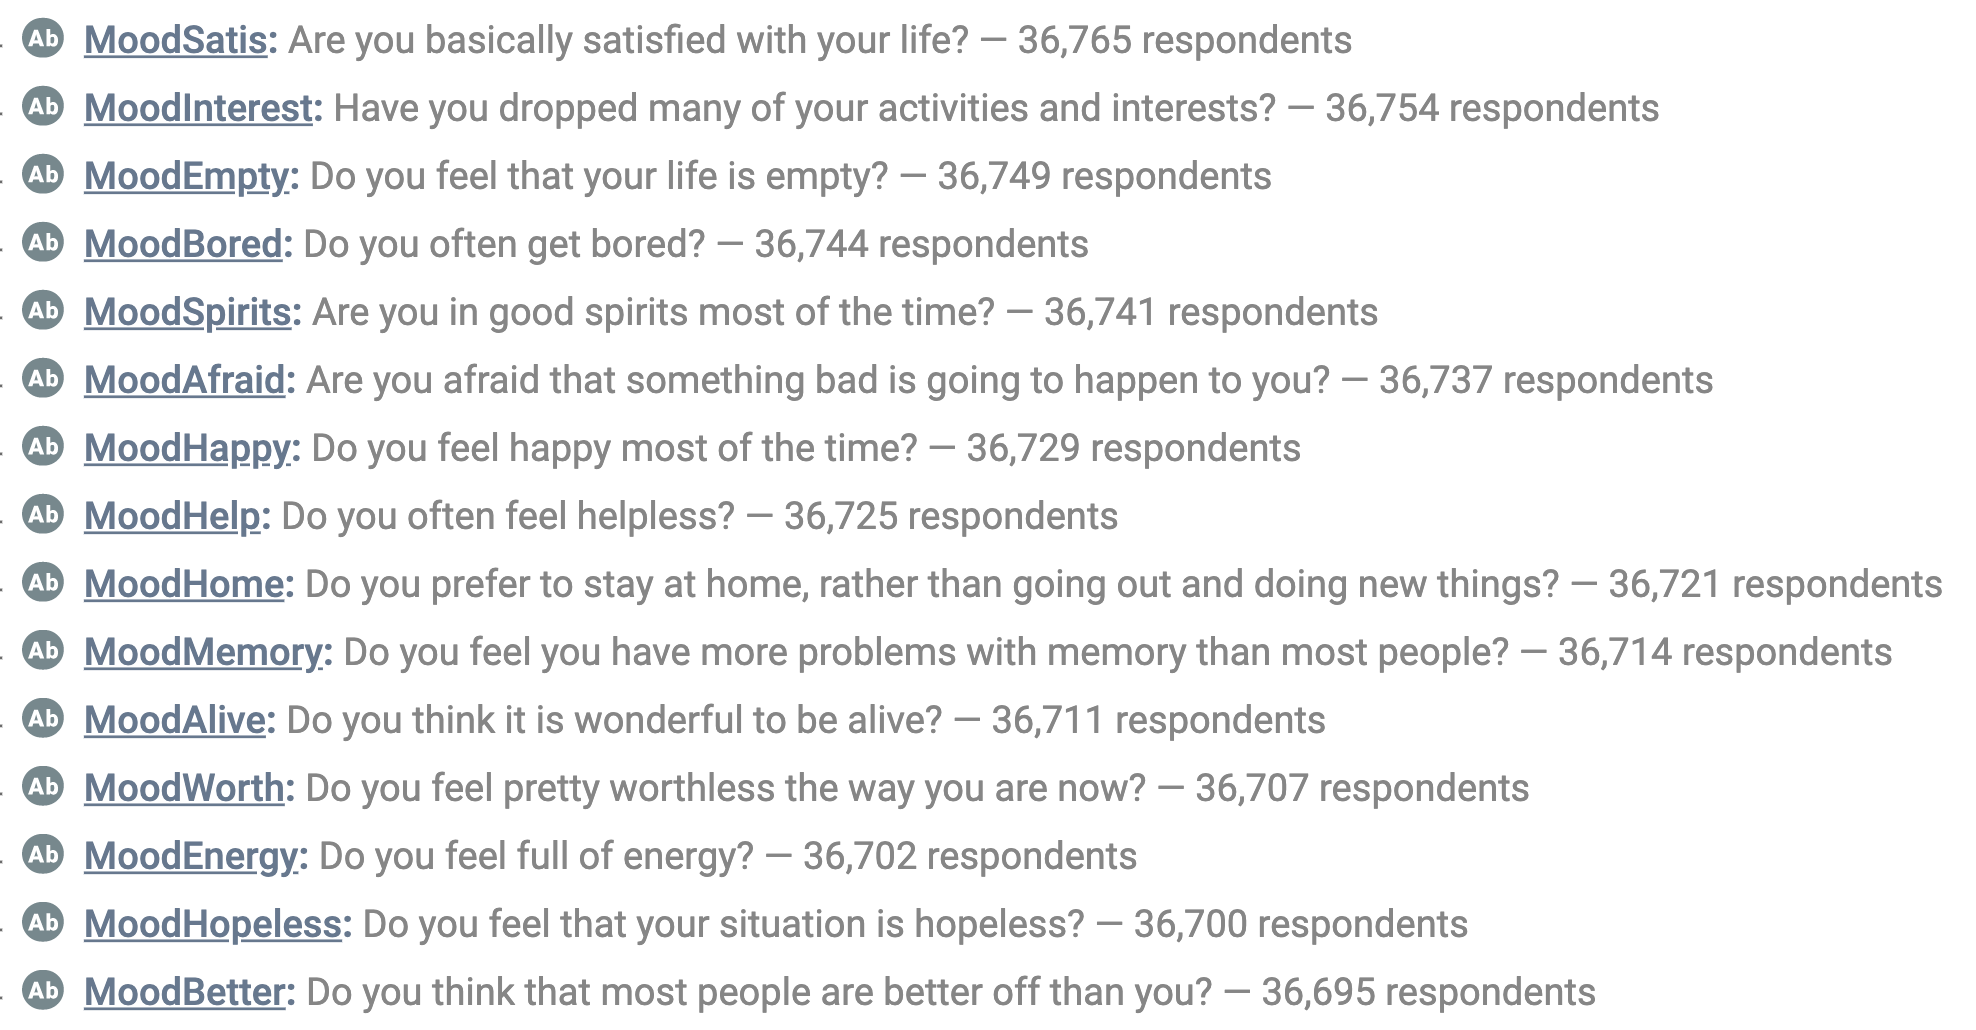

In [17]:
X['positive'] = X[positive].sum(axis=1)
#X[positive + ['positive']]

In [20]:
# X['negative'] = X[negative+depress].sum(axis=1)
# #X[negative + ['negative']]

In [21]:
X['lonely'] = X[lonely].sum(axis=1)
#X[lonely + ['lonely']]

In [22]:
X['energy'] = X[lonely].sum(axis=1)
#X[lonely + ['lonely']]

In [23]:
#X['depress'] = X[depress].sum(axis=1)
#X[depress + ['depress']]

In [24]:
#X = X.drop(columns=positive)
#X = X.drop(columns=negative)
#X = X.drop(columns=depress)
#X = X.drop(columns=lonely)
#X = X.drop(columns=energy)

In [25]:
X

,age_x,days_elapsed,days_acquired_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,MoodAfraid,MoodHappy,...,EthnLatino,EthnPNA,Education,Income,Employment,Veteran,Research,positive,lonely,energy
0,73.0,26590,0,1,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0
1,64.2,23368,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,6.0,6.0,3.0,0.0,0.0,1.0,4.0,4.0
2,42.9,15650,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,8.0,1.0,2.0,0.0,1.0,3.0,1.0,1.0
3,35.7,12935,0,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,1.0
4,73.7,26867,0,0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,8.0,5.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,64.4,23462,0,1,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,3.0,5.0,4.0,0.0,1.0,4.0,1.0,1.0
241,64.5,23506,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
242,69.5,25356,0,1,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,5.0,2.0,3.0,0.0,0.0,4.0,1.0,1.0
243,58.5,21289,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,5.0,4.0,3.0,0.0,1.0,4.0,1.0,1.0


In [26]:
X

,age_x,days_elapsed,days_acquired_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,MoodAfraid,MoodHappy,...,EthnLatino,EthnPNA,Education,Income,Employment,Veteran,Research,positive,lonely,energy
0,73.0,26590,0,1,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0
1,64.2,23368,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,6.0,6.0,3.0,0.0,0.0,1.0,4.0,4.0
2,42.9,15650,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,8.0,1.0,2.0,0.0,1.0,3.0,1.0,1.0
3,35.7,12935,0,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,1.0
4,73.7,26867,0,0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,8.0,5.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,64.4,23462,0,1,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,3.0,5.0,4.0,0.0,1.0,4.0,1.0,1.0
241,64.5,23506,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
242,69.5,25356,0,1,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,5.0,2.0,3.0,0.0,0.0,4.0,1.0,1.0
243,58.5,21289,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,5.0,4.0,3.0,0.0,1.0,4.0,1.0,1.0


In [27]:
#X.value_counts

In [28]:
# for i in range(len(X.T)):
#     print(X.iloc[:,i].value_counts())

In [29]:
X = X.drop(columns=['HeightPNA', 'WeightPNA', 'RacePNA','EthnPNA'])

In [30]:
X.columns

Index(['age_x', 'days_elapsed', 'days_acquired_x', 'MoodSatis', 'MoodInterest',
       'MoodEmpty', 'MoodBored', 'MoodSpirits', 'MoodAfraid', 'MoodHappy',
       'MoodHelp', 'MoodHome', 'MoodMemory', 'MoodAlive', 'MoodWorth',
       'MoodEnergy', 'MoodHopeless', 'MoodBetter', 'age_y', 'days_acquired_y',
       'COVPDDiag', 'COVSrcInfo', 'COVSympInfect', 'COVProDiag', 'COVTest',
       'COVFever', 'COVCough', 'COVSympChill', 'COVSympSweat',
       'COVSympShortBreath', 'COVSympChestTight', 'COVSympChestPain',
       'COVSympTired', 'COVSympSleepy', 'COVSympSoreThroat', 'COVSympCongest',
       'COVSympMuscleAche', 'COVSympJointPain', 'COVSympLoseSmell',
       'COVSympLoseTase', 'COVSympLoseApetite', 'COVSympDiarrhea',
       'COVSympStomachPain', 'COVSympNausea', 'COVSympVomit',
       'COVSympLightHead', 'COVClinicalTrial', 'COVSelfIsolate',
       'COVLivingSituation', 'COVRegion', 'COVSocialDistancing',
       'COVAlterPhysTher', 'COVAlterSpeechTher', 'COVAlterOccTher',
       'COVA

['age_m', 'days_acquired_m', 'MoodSatis', 'MoodInterest', 'MoodEmpty', 'MoodBored', 'MoodSpirits', 'MoodAfraid', 'MoodHappy', 'MoodHelp', 'MoodHome', 'MoodMemory', 'MoodAlive', 'MoodWorth', 'MoodEnergy', 'MoodHopeless', 'MoodBetter', 'age_c', 'days_acquired_c', 'COVPDDiag', 'COVSrcInfo', 'COVSympInfect', 'COVProDiag', 'COVTest', 'COVFever', 'COVCough', 'COVSympChill', 'COVSympSweat', 'COVSympShortBreath', 'COVSympChestTight', 'COVSympChestPain', 'COVSympTired', 'COVSympSleepy', 'COVSympSoreThroat', 'COVSympCongest', 'COVSympMuscleAche', 'COVSympJointPain', 'COVSympLoseSmell', 'COVSympLoseTase', 'COVSympLoseApetite', 'COVSympDiarrhea', 'COVSympStomachPain', 'COVSympNausea', 'COVSympVomit', 'COVSympLightHead', 'COVClinicalTrial', 'COVSelfIsolate', 'COVLivingSituation', 'COVRegion', 'COVSocialDistancing', 'COVAlterPhysTher', 'COVAlterSpeechTher', 'COVAlterOccTher', 'COVAlterMenHealth', 'COVAlterSpprtGrp', 'COVAlterExercise', 'COVAlterSeeFamily', 'COVAlterSeeFriend', 'COVAlterCommunAct', 'COVAlterReligAct', 'COVAlterVolntrAct', 'COVAlterClinVisit', 'COVAlterOthMedApt', 'COVSocDisWork', 'COVSocDisHouseFinance', 'COVRschAttdtChange', 'COVRschPartcpLikely', 'fox_insight_id', 'max(days_elapsed)']

In [31]:
X

,age_x,days_elapsed,days_acquired_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,MoodAfraid,MoodHappy,...,EthnCuban,EthnLatino,Education,Income,Employment,Veteran,Research,positive,lonely,energy
0,73.0,26590,0,1,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0
1,64.2,23368,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,6.0,6.0,3.0,0.0,0.0,1.0,4.0,4.0
2,42.9,15650,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,8.0,1.0,2.0,0.0,1.0,3.0,1.0,1.0
3,35.7,12935,0,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,1.0
4,73.7,26867,0,0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,8.0,5.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,64.4,23462,0,1,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,3.0,5.0,4.0,0.0,1.0,4.0,1.0,1.0
241,64.5,23506,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
242,69.5,25356,0,1,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,5.0,2.0,3.0,0.0,0.0,4.0,1.0,1.0
243,58.5,21289,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,5.0,4.0,3.0,0.0,1.0,4.0,1.0,1.0


In [32]:
X

,age_x,days_elapsed,days_acquired_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,MoodAfraid,MoodHappy,...,EthnCuban,EthnLatino,Education,Income,Employment,Veteran,Research,positive,lonely,energy
0,73.0,26590,0,1,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0
1,64.2,23368,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,6.0,6.0,3.0,0.0,0.0,1.0,4.0,4.0
2,42.9,15650,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,8.0,1.0,2.0,0.0,1.0,3.0,1.0,1.0
3,35.7,12935,0,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,1.0
4,73.7,26867,0,0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,8.0,5.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,64.4,23462,0,1,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,3.0,5.0,4.0,0.0,1.0,4.0,1.0,1.0
241,64.5,23506,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
242,69.5,25356,0,1,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,5.0,2.0,3.0,0.0,0.0,4.0,1.0,1.0
243,58.5,21289,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,5.0,4.0,3.0,0.0,1.0,4.0,1.0,1.0


### Other Columns
...
...
...

In [33]:
def set_axis(ax, x=None, y=None, xlabel='x', ylabel='y', title='Plot', titlesize=16, fs=12):
    ax.set_xlabel(xlabel, fontname = 'Futura', fontsize=fs)
    ax.set_ylabel(ylabel, fontname = 'Futura', fontsize=fs)
    if x:
        ax.set_xticks(x)
    if y:
        ax.set_xticks(y)
    ax.set_title(title, fontname='Futura', fontsize=16)
    ax.set_facecolor('white')
    ax.grid(color = 'black', linestyle='--', linewidth=0.1)

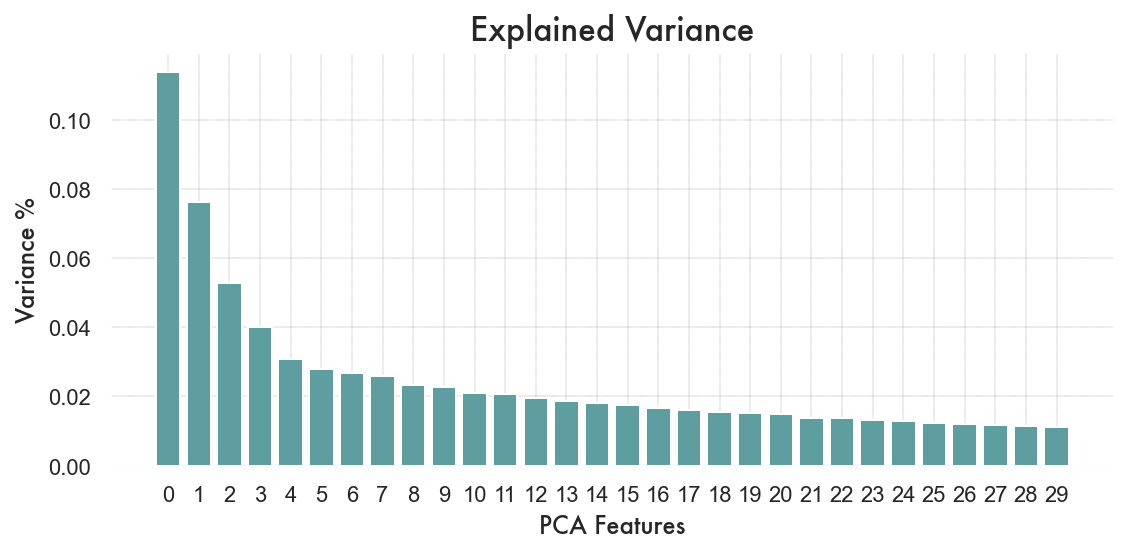

In [34]:
# Standardize the data 
X_std = StandardScaler().fit_transform(X)

# Create a PCA instance
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.bar(features, pca.explained_variance_ratio_, color='cadetblue')
set_axis(ax, features, None,'PCA Features', 'Variance %', 'Explained Variance')

plt.tight_layout()

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [35]:
X_std.shape

(240, 90)

In [36]:
pca = PCA(n_components=35)
pca.fit(X_std)
pca.explained_variance_ratio_.sum()

0.7976874658935584

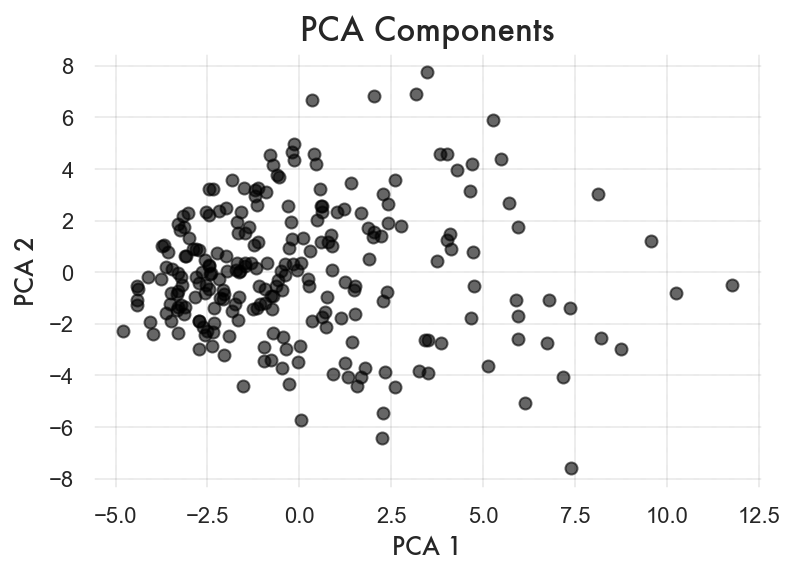

In [37]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(PCA_components[0], PCA_components[1], alpha=.6, color='black')
set_axis(ax, None, None, 'PCA 1', 'PCA 2', 'PCA Components')

In [38]:
pca = PCA(n_components=35)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)

In [39]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.352455,-2.968184,0.223809,-0.654976,0.945613,1.466500,-0.128379,0.669919,0.613570,0.706315,...,-0.917368,1.009334,0.719658,-0.934724,-0.319840,-1.045343,-0.891759,-0.412592,-0.288493,-0.526817
1,2.591769,-4.456016,-1.659470,4.448592,0.390179,0.984667,0.918314,0.242582,1.730647,0.626153,...,-0.523130,0.855834,2.365350,-0.419009,1.955301,0.756879,-0.437209,0.061894,-1.642331,-0.635431
2,1.218001,2.462409,-1.916457,-0.508506,-0.133612,-0.407644,-0.662532,0.817273,-1.017985,-1.234479,...,1.310640,0.850166,-2.532961,-0.169245,-0.877713,0.958406,-0.234973,0.096704,1.243399,0.211538
3,5.271436,5.915739,2.015821,-1.312902,-1.767960,-1.761214,3.706169,0.826687,2.067214,0.208151,...,-0.053014,-0.556676,0.519845,0.347153,0.753253,1.322753,-0.064999,0.999031,-1.681252,0.690502
4,1.231472,-3.507380,-0.350136,-0.613952,-1.016780,2.504328,1.583392,-0.883993,0.720727,-0.449571,...,2.118672,1.229537,1.860951,-1.017398,-0.368554,-0.273873,-0.426244,1.323558,0.774224,-1.154121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-2.445909,0.255162,-0.848799,0.688392,-0.592821,0.377929,-0.484283,-0.082757,0.812929,0.196887,...,-0.474626,-0.676738,-0.810199,-0.243962,0.148958,0.432127,0.647644,-0.838622,0.064754,-0.862693
236,1.510970,-1.624305,0.508125,4.396510,-0.566811,2.185613,5.212371,0.417693,-0.508937,0.104750,...,0.227818,1.031338,0.662356,0.862131,1.375368,-0.239717,-1.275265,0.197999,0.353616,0.744123
237,-1.828557,-1.502408,0.037229,-0.853000,0.510636,0.074560,-1.025687,-0.316431,-0.628323,-0.451526,...,0.404403,1.033708,0.021020,0.094345,-0.013524,1.221694,-2.068446,-1.584594,-0.544508,-0.501745
238,-1.702933,0.370840,-0.622665,-0.070812,0.999361,-1.193288,-1.614191,0.120210,0.027743,-0.605476,...,0.408137,1.057296,-0.145809,0.026461,0.086289,1.723092,-0.532379,-0.044254,0.159815,0.916012


In [40]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(principalComponents)
    wcss.append(kmeans_pca.inertia_)

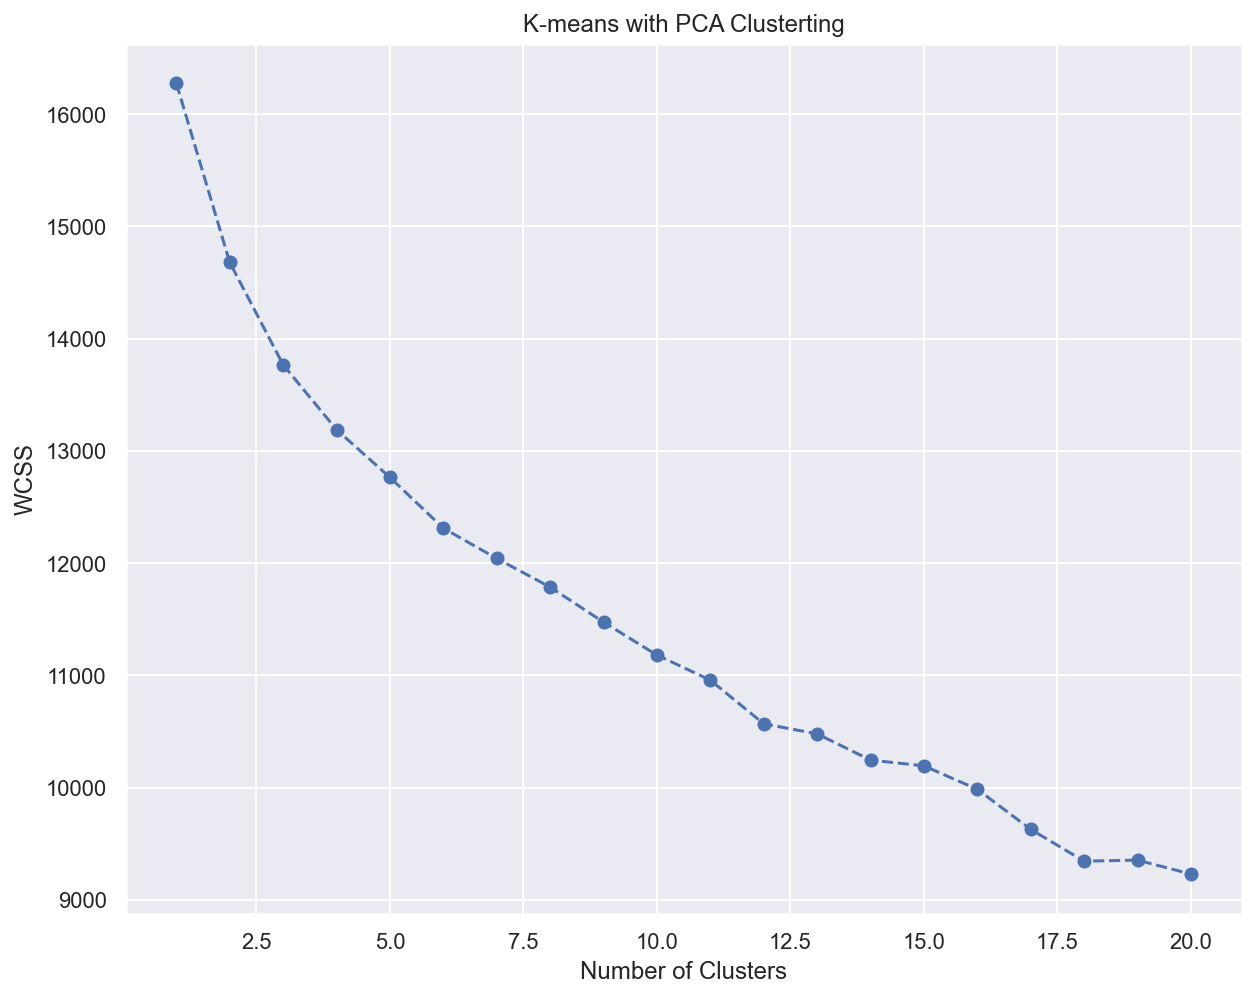

In [41]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clusterting')
plt.show()

## K-Mean Clustering with PCA

In [42]:
kmeans_pca = KMeans(n_clusters=7, init = 'k-means++', random_state=42)
kmeans_pca.fit(principalComponents)

KMeans(n_clusters=7, random_state=42)

In [43]:
#[f'Comp{i+1}' for i in range(35)]

In [44]:
df_kmeans = pd.concat([X.reset_index(drop=True), pd.DataFrame(principalComponents)], axis =1)
df_kmeans.columns.values[-35:]=[f'Comp{i+1}' for i in range(35)]
df_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [45]:
df_kmeans

,age_x,days_elapsed,days_acquired_x,MoodSatis,MoodInterest,MoodEmpty,MoodBored,MoodSpirits,MoodAfraid,MoodHappy,...,Comp27,Comp28,Comp29,Comp30,Comp31,Comp32,Comp33,Comp34,Comp35,Segment K-means PCA
0,73.0,26590,0,1,1.0,0.0,1.0,1.0,0.0,0.0,...,1.009334,0.719658,-0.934724,-0.319840,-1.045343,-0.891759,-0.412592,-0.288493,-0.526817,2
1,64.2,23368,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.855834,2.365350,-0.419009,1.955301,0.756879,-0.437209,0.061894,-1.642331,-0.635431,4
2,42.9,15650,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.850166,-2.532961,-0.169245,-0.877713,0.958406,-0.234973,0.096704,1.243399,0.211538,1
3,35.7,12935,0,0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.556676,0.519845,0.347153,0.753253,1.322753,-0.064999,0.999031,-1.681252,0.690502,6
4,73.7,26867,0,0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.229537,1.860951,-1.017398,-0.368554,-0.273873,-0.426244,1.323558,0.774224,-1.154121,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,64.4,23462,0,1,0.0,0.0,1.0,1.0,1.0,1.0,...,-0.676738,-0.810199,-0.243962,0.148958,0.432127,0.647644,-0.838622,0.064754,-0.862693,3
236,64.5,23506,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.031338,0.662356,0.862131,1.375368,-0.239717,-1.275265,0.197999,0.353616,0.744123,4
237,69.5,25356,0,1,0.0,0.0,0.0,1.0,1.0,1.0,...,1.033708,0.021020,0.094345,-0.013524,1.221694,-2.068446,-1.584594,-0.544508,-0.501745,3
238,58.5,21289,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,1.057296,-0.145809,0.026461,0.086289,1.723092,-0.532379,-0.044254,0.159815,0.916012,3


In [46]:
my_dict = {i:f'{i+1}th' for i in range(35)}
my_dict[0] = '1st'; my_dict[1] = '2nd'; my_dict[2] = '3rd';

In [47]:
df_kmeans['Segment'] = df_kmeans['Segment K-means PCA'].map(my_dict)

In [48]:
df_kmeans['Segment'].value_counts()

4th    99
7th    33
5th    29
3rd    29
2nd    29
1st    17
6th     4
Name: Segment, dtype: int64

<Figure size 576x360 with 0 Axes>

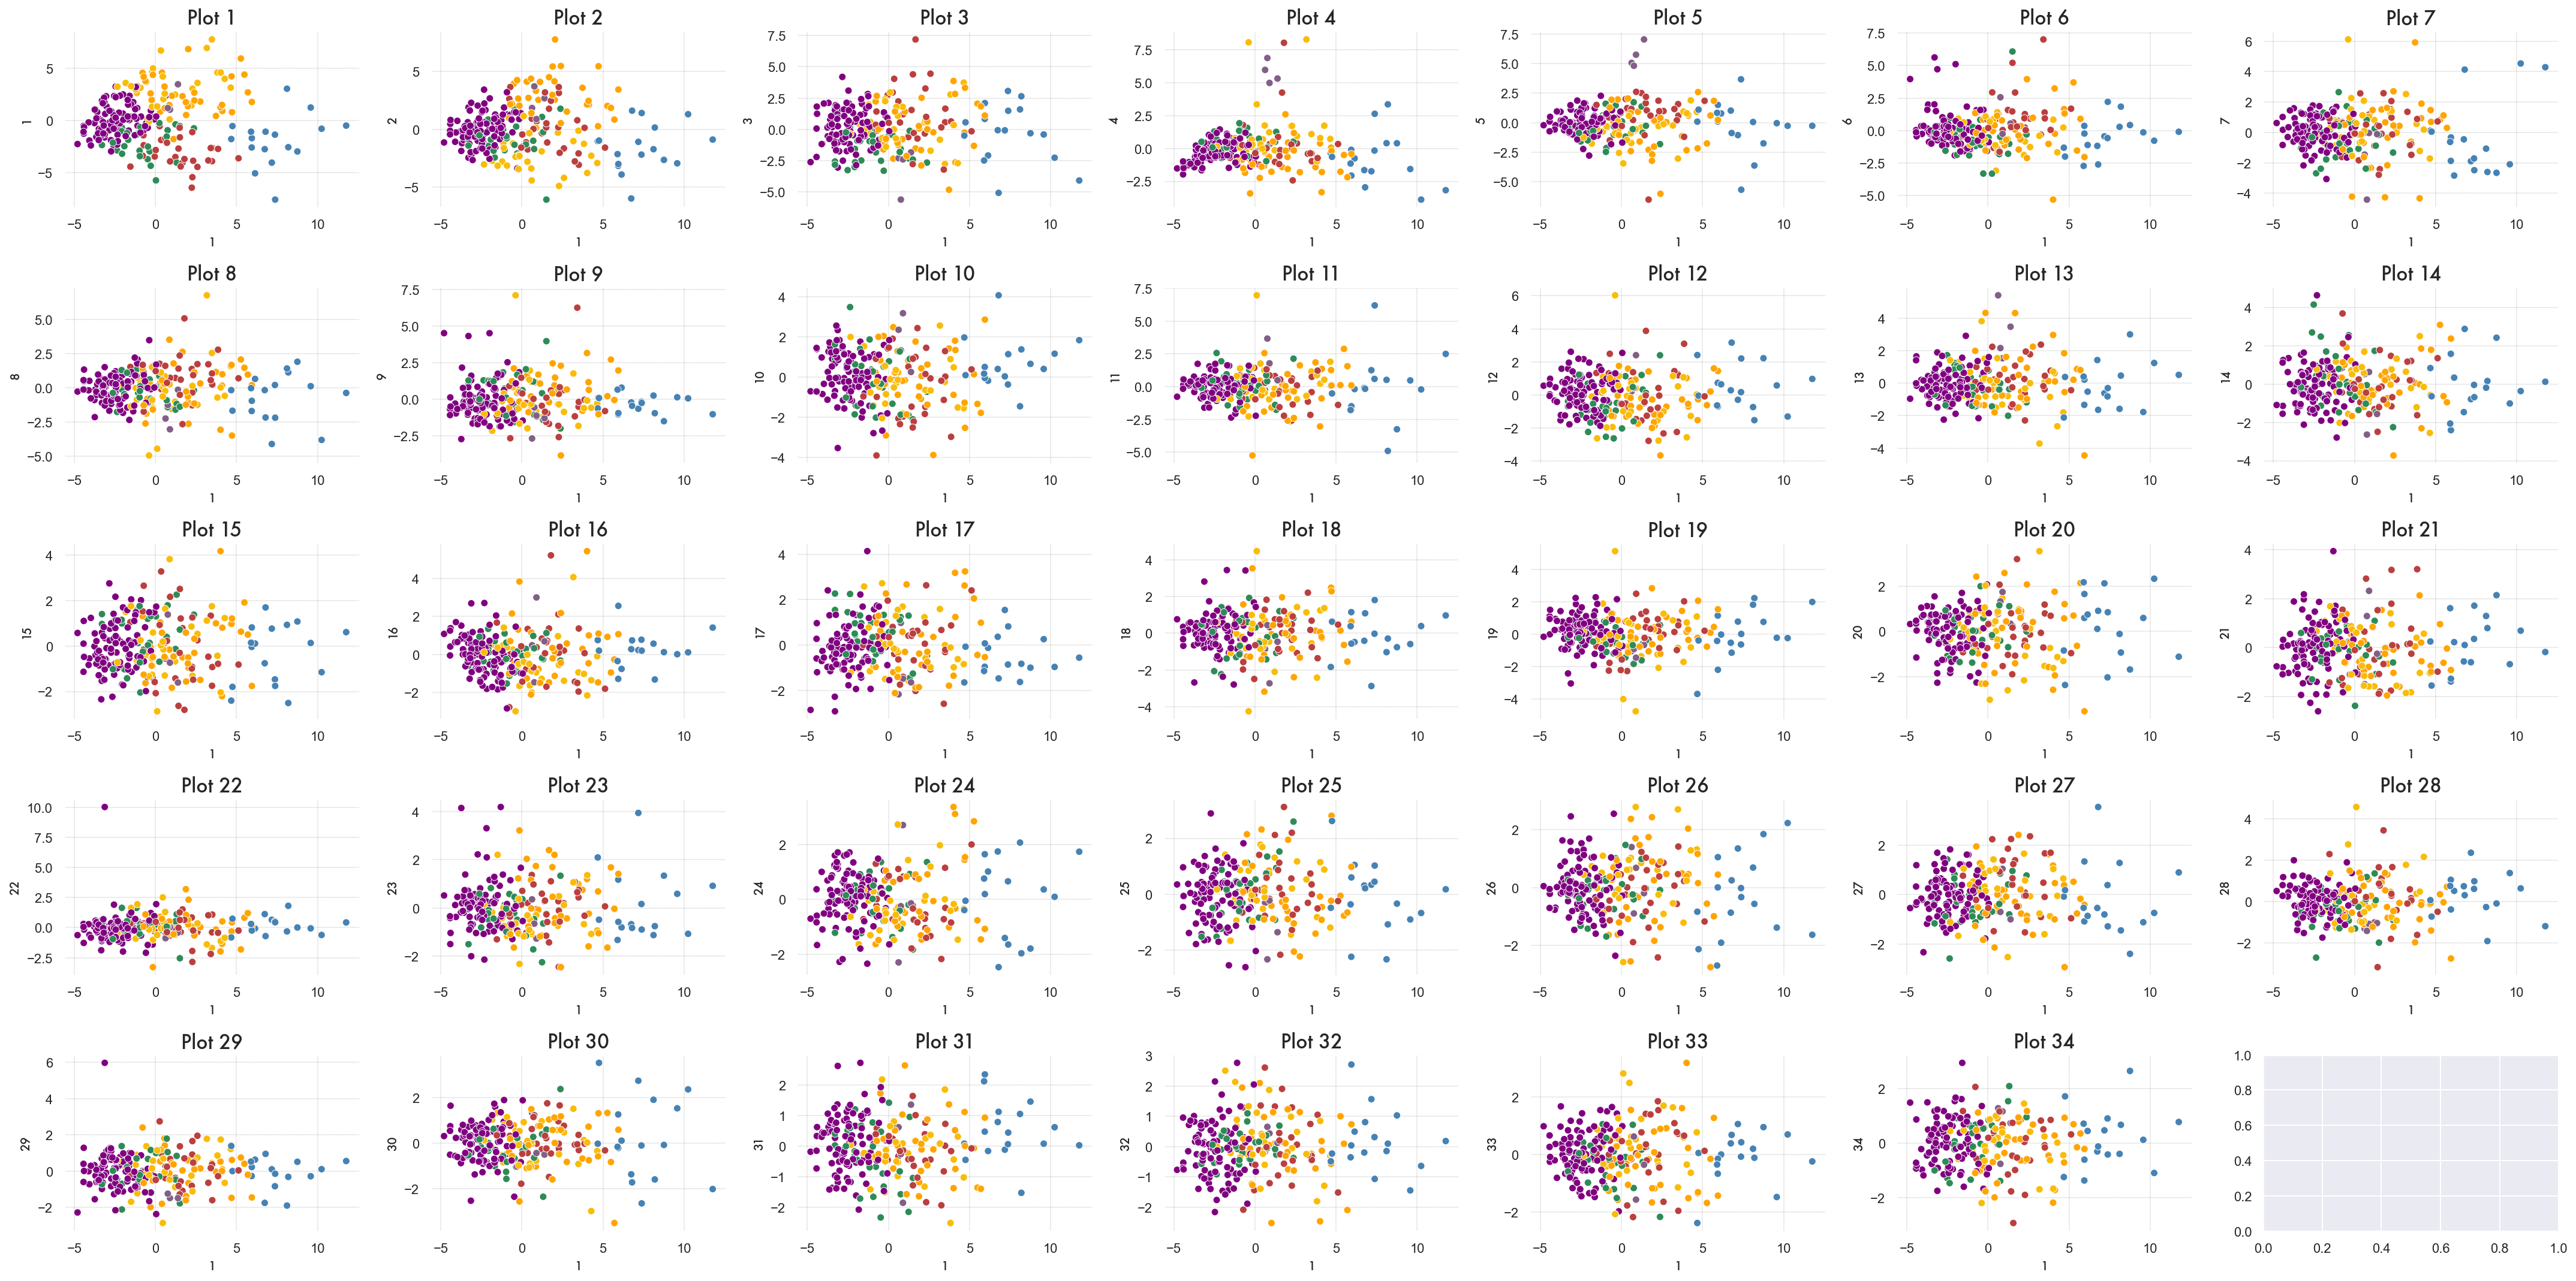

In [49]:
x_axis = df_kmeans['Comp1']
#y_axis = df_kmeans['Comp3']
plt.figure(figsize= (8,5))
fig, ax = plt.subplots(5,7,figsize=(30,15))

ax = ax.flatten()
for i in range(34):
    y_axis = df_kmeans[f'Comp{i+2}']
    sns.scatterplot(x_axis, y_axis, hue = df_kmeans['Segment'], ax=ax[i],legend=False,
                palette = ['steelblue','xkcd:golden rod','seagreen','purple','xkcd:dull red','xkcd:dusty purple', 'orange','black','cadetblue'],
                hue_order=['1st', '2nd', '3rd','4th','5th','6th','7th','8th','9th'])
    set_axis(ax[i], None, None,'1', f'{i+1}', f'Plot {i+1}', 14, 10)

plt.tight_layout()
plt.show()

In [50]:
first = df_kmeans[df_kmeans['Segment']=='1st']

In [51]:
second = df_kmeans[df_kmeans['Segment']=='2nd']

In [52]:
third = df_kmeans[df_kmeans['Segment']=='3rd']

In [53]:
fourth = df_kmeans[df_kmeans['Segment']=='4th']

In [54]:
fifth = df_kmeans[df_kmeans['Segment']=='5th']

In [55]:
sixth = df_kmeans[df_kmeans['Segment']=='6th']
seventh = df_kmeans[df_kmeans['Segment']=='7th']

In [56]:
print(first.shape[0])
print(second.shape[0])
print(third.shape[0])
print(fourth.shape[0])
print(fifth.shape[0])
print(sixth.shape[0])
print(seventh.shape[0])

17
29
29
99
29
4
33


In [57]:
first_pos = (sum(first['positive'])/len(first))/4
second_pos = (sum(second['positive'])/len(second))/4
third_pos = (sum(third['positive'])/len(third))/4
fourth_pos = (sum(fourth['positive'])/len(fourth))/4
fifth_pos = (sum(fifth['positive'])/len(fifth))/4
sixth_pos = (sum(sixth['positive'])/len(sixth))/4
seventh_pos = (sum(seventh['positive'])/len(seventh))/4
cols = ['1st','2nd','3rd','4th','5th','6th','7th']
print('Positive')
for idx, perc in enumerate([first_pos, second_pos, third_pos, fourth_pos, fifth_pos, sixth_pos]):
    print(cols[idx],round(perc,2))

Positive
1st 0.19
2nd 0.88
3rd 0.9
4th 0.97
5th 0.49
6th 1.0


In [59]:
first_neg = (sum(first['negative'])/len(first))/10
second_neg = (sum(second['negative'])/len(second))/10
third_neg = (sum(third['negative'])/len(third))/7
fourth_neg = (sum(fourth['negative'])/len(fourth))/10
fifth_neg = (sum(fifth['negative'])/len(fifth))/10
sixth_neg = (sum(sixth['negative'])/len(sixth))/10
seventh_neg = (sum(seventh['negative'])/len(seventh))/10

cols = ['1st','2nd','3rd','4th','5th','6th','7th']
print('Negative')
for idx, perc in enumerate([first_neg, second_neg, third_neg, fourth_neg, fifth_neg, sixth_neg,seventh_neg]):
    print(cols[idx],round(perc,2))

In [60]:
first_lon = (sum(first['lonely'])/len(first))/5
second_lon = (sum(second['lonely'])/len(second))/5
third_lon = (sum(third['lonely'])/len(third))/5
fourth_lon = (sum(fourth['lonely'])/len(fourth))/5
fifth_lon = (sum(fifth['lonely'])/len(fifth))/5
sixth_lon = (sum(sixth['lonely'])/len(sixth))/5
seventh_lon = (sum(seventh['lonely'])/len(seventh))/5

cols = ['1st','2nd','3rd','4th','5th','6th','7th']
print('Lonely')
for idx, perc in enumerate([first_neg, second_neg, third_neg, fourth_neg, fifth_neg, sixth_neg,seventh_neg]):
    print(cols[idx],round(perc,2))

Lonely


NameError: name 'first_neg' is not defined

In [ ]:
pos,neg,lon,en=[sum(first[cat[0]])/len(first)/cat[1]*100 \
                     for cat in [('positive',4), ('negative',10), ('lonely',5), ('MoodEnergy',1)]]

In [ ]:
#first['MoodEnergy']

In [ ]:
def avg_mood_stats(df_group, group, plot=False, stats=True, ax=None, highlight=0, color='cadetblue'):   
    
    pos,neg,lon,en=[sum(df_group[cat[0]])/len(df_group)/cat[1]*100 \
                         for cat in [('positive',4), ('negative',10), ('lonely',5), ('MoodEnergy',1)]]
        
    
    if stats==True:
        print('Average % of Columns:')
        print(f'Positive:       {pos:.2f}')
        print(f'Negative:       {neg:.2f}')
        print(f'Lonely:         {lon:.2f}')
        print(f'Energy:         {en:.2f}')
        
    ax=ax
    if plot==True:
        #fig, ax = plt.subplots(1,1,figsize=(4,3))
        bar_colors = ['grey' for i in range(4)]; bar_colors[highlight]=color
        ax.set_title(f'{group} Stats', color=color)
        ax.bar(['Positive','Negative','Lonely','Energy'], [pos, neg, lon, en], color=bar_colors)
        set_axis(ax, x=None, y=None, xlabel='Mood', ylabel='Percentage', title=f'{group} Group Stats')
        ax.set_ylim(0,100)
        
        

In [ ]:
pos,neg,lon,en=[(first[cat[0]])/len(first)/cat[1]*100 \
                         for cat in [('positive',4), ('negative',10), ('lonely',5), ('energy',1)]]

In [ ]:
#pos

In [ ]:
lonely

In [ ]:
def avg_mood_stats(df_group, group, plot=False, stats=True, ax=None, highlight=0, color='cadetblue'):   
    
    pos,neg,lon,en, dep=[(df_group[cat].sum()/len(df_group)).values.mean()*100 \
                         for cat in [positive, negative, lonely, energy, depress]]
    if stats==True:
        print('Average % of Columns:')
        print(f'Positive:       {pos:.2f}')
        print(f'Negative:       {neg:.2f}')
        print(f'Lonely:         {lon:.2f}')
        print(f'Energy:         {en:.2f}')
        
    ax=ax
    if plot==True:
        #fig, ax = plt.subplots(1,1,figsize=(4,3))
        bar_colors = ['grey' for i in range(5)]; bar_colors[highlight]=color
        ax.set_title(f'{group} Stats', color=color)
        ax.bar(['Positive','Negative','Lonely','Energy'], [pos, neg, lon, en], color=bar_colors)
        set_axis(ax, x=None, y=None, xlabel='Mood', ylabel='Percentage', title=f'{group} Group Stats')
        ax.set_ylim(0,100)
        
        

In [ ]:
def ind_mood_stats(df_group, col, category):
    print(f'Category Type: {category}')
    print(f'No of Individuals: {len(first)}')
    print()
    print(df_group[col].sum()/len(df_group))
    

In [ ]:
def highlight_plots(cat_num):
    fig, ax = plt.subplots(2,4, figsize=(14,6))
                
    colors = ['steelblue','xkcd:golden rod','seagreen','purple','xkcd:dull red','xkcd:dusty purple', 'orange','black','cadetblue']
#    colors = ['xkcd:golden rod','xkcd:dull red','seagreen','purple','steelblue','xkcd:purplish',]
    ax=ax.flatten()
    avg_mood_stats(first, 'First', True, False, ax[0], cat_num,colors[0])
    avg_mood_stats(second, 'Second', True, False, ax[1], cat_num,colors[1])
    avg_mood_stats(third, 'Third', True, False, ax[2], cat_num,colors[2])
    avg_mood_stats(fourth, 'Fourth', True, False, ax[3],cat_num,colors[3])
    avg_mood_stats(fifth, 'Fifth', True, False, ax[4], cat_num,colors[4])
    avg_mood_stats(sixth, 'Sixth', True, False, ax[5], cat_num,colors[5])
    avg_mood_stats(seventh, 'Seventh', True, False, ax[6], cat_num,colors[6])
    set_axis(ax[7], x=None, y=None, xlabel=None, ylabel=None, title=None)
    ax[7].set_xticks([]); ax[7].set_yticks([])


    plt.tight_layout()

In [ ]:
highlight_plots(0)

In [ ]:
highlight_plots(1)

In [ ]:
highlight_plots(2)

In [ ]:
highlight_plots(3)

In [ ]:
ind_mood_stats(second, positive, 'Positive')
print()
print()
ind_mood_stats(second, negative, 'Negative')

In [ ]:
ind_mood_stats(third, negative, 'Negative')